importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

loading the dataset

In [3]:
#load data
data= pd.read_csv("Company_data.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


performing the EDA on dataset

In [4]:
#EDA
data.columns


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
data.shape

(200, 4)

In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.isnull().sum().sum()

0

In [6]:
data.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [9]:
#Create feature and target array from such given data
X=data.drop('Sales',axis=1).values
y=data['Sales'].values

In [10]:
#Predicting sales value from a single feature (tv)
X_tv=X[:,0]

In [11]:
type(X_tv),type(y)

(numpy.ndarray, numpy.ndarray)

In [12]:
X_tv.shape,y.shape

((200,), (200,))

In [13]:
X_tv=X_tv.reshape(-1,1)
y=y.reshape(-1,1)

In [14]:
X_tv.shape,y.shape

((200, 1), (200, 1))

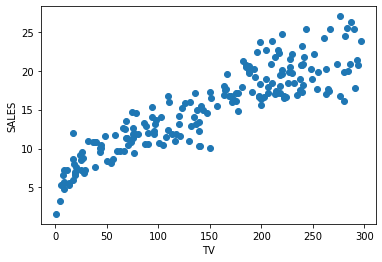

In [15]:
#plotting sales value vs tv
plt.scatter(X_tv, y)
plt.xlabel('TV')
plt.ylabel('SALES')
plt.show()

In [16]:
#Fitting a regression model
reg = linear_model.LinearRegression()
reg.fit(X_tv, y)

LinearRegression()

splitting data into train and test data

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_tv,y,test_size=0.30,train_size=0.7)

performance on train data

In [27]:
#Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_train_pred = reg.predict(X_train)

print(f'MAE = {mean_absolute_error(y_train, y_train_pred)}')
print(f'MSE = {mean_squared_error(y_train, y_train_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'R_2 = {r2_score(y_train, y_train_pred)}')
     

MAE = 1.6890210209945828
MSE = 4.263479812426291
RMSE = 2.0648195592899374
R_2 = 0.849102860293117


performance on test data

In [28]:
#Evaluating the model on testing data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_test_pred = reg.predict(X_test)

print(f'MAE = {mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_test_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_test_pred))}')
print(f'R_2 = {r2_score(y_test, y_test_pred)}')
     

MAE = 2.1609084983234452
MSE = 7.444360096989082
RMSE = 2.728435466891068
R_2 = 0.7197660904013392


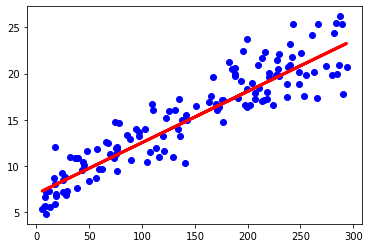

In [30]:

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='red', linewidth=3)
plt.show()

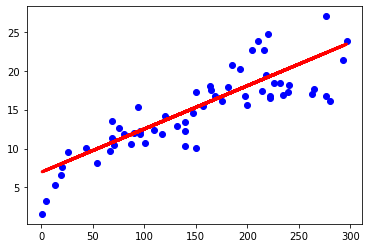

In [32]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, reg.predict(X_test), color='red', linewidth=3)
plt.show()

In [33]:
prediction_space = np.linspace(min(X_train), max(X_train)).reshape(-1,1)


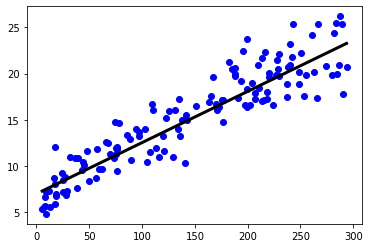

In [35]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()
     

In [36]:
prediction_space = np.linspace(min(X_test), max(X_test)).reshape(-1,1)

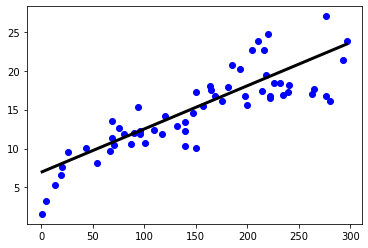

In [37]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()
     